In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
age  = pd.read_csv('../data/cleaned_data/age.csv')
comm = pd.read_csv('../data/cleaned_data/comm.csv')

age  = age.set_index('county')
comm = comm.set_index('county')

In [ ]:
age

In [ ]:
comm

In [3]:
data = pd.merge(comm,age,'outer',on = ['county','workers','drove_alone','carpooled',
                                      'pub_transit','state','year'])

In [ ]:
data

In [4]:
pattern = r'mean'
keep = ['workers']
for col in data.columns:
    if re.search(pattern,col):
        keep.append(col)

In [5]:
avg_comm = data[keep].groupby(data.index).mean()
#avg_comm

In [ ]:
avg_comm.sort_values('mean_min', ascending = False)

In [ ]:
avg_comm.loc[avg_comm['pub_transit_mean_min'] < avg_comm['mean_min']].sort_values('pub_transit_mean_min')

In [ ]:
comm.loc['Lapeer County, Michigan']

In [ ]:
avg_comm.corr()

In [6]:
def heatmap(df, center = 0):
    fig, ax = plt.subplots(figsize=(14, 14))

    corr = df.corr(numeric_only = True)
    # create a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Generate a mask for the upper triangle (since a correlation matrix is diagonally symmetric)
    mask = np.zeros_like(corr, dtype=bool)
    mask[np.triu_indices_from(mask)] = True

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, cmap=cmap, mask = mask, center=center,
                square=True, linewidths=.5, cbar_kws={"shrink": .5});

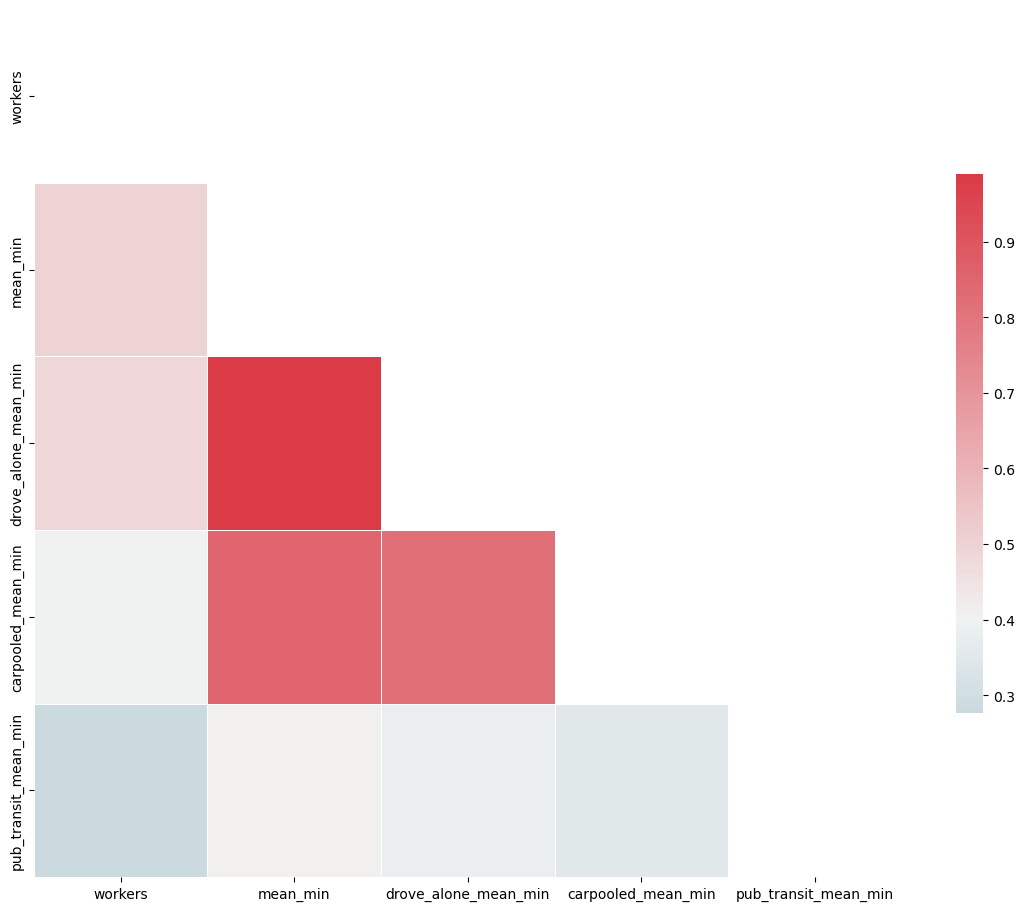

In [7]:
heatmap(avg_comm, center = 0.4)
#plt.savefig('../data/dashboards/comm_corr.png')

### The mean travel time is heavily correlated with the mean travel time of those who drive alone! This may be because the vast majority of people who commute drive alone, meaning this group of people has the greatest impact on the overall average travel time.

In [8]:
pattern2 = r'median'
keep = ['workers']

for col in data.columns:
    if re.search(pattern2,col):
        keep.append(col)

In [9]:
avg_age = data[keep].groupby(data.index).mean()
#avg_age

In [ ]:
avg_age.corr()

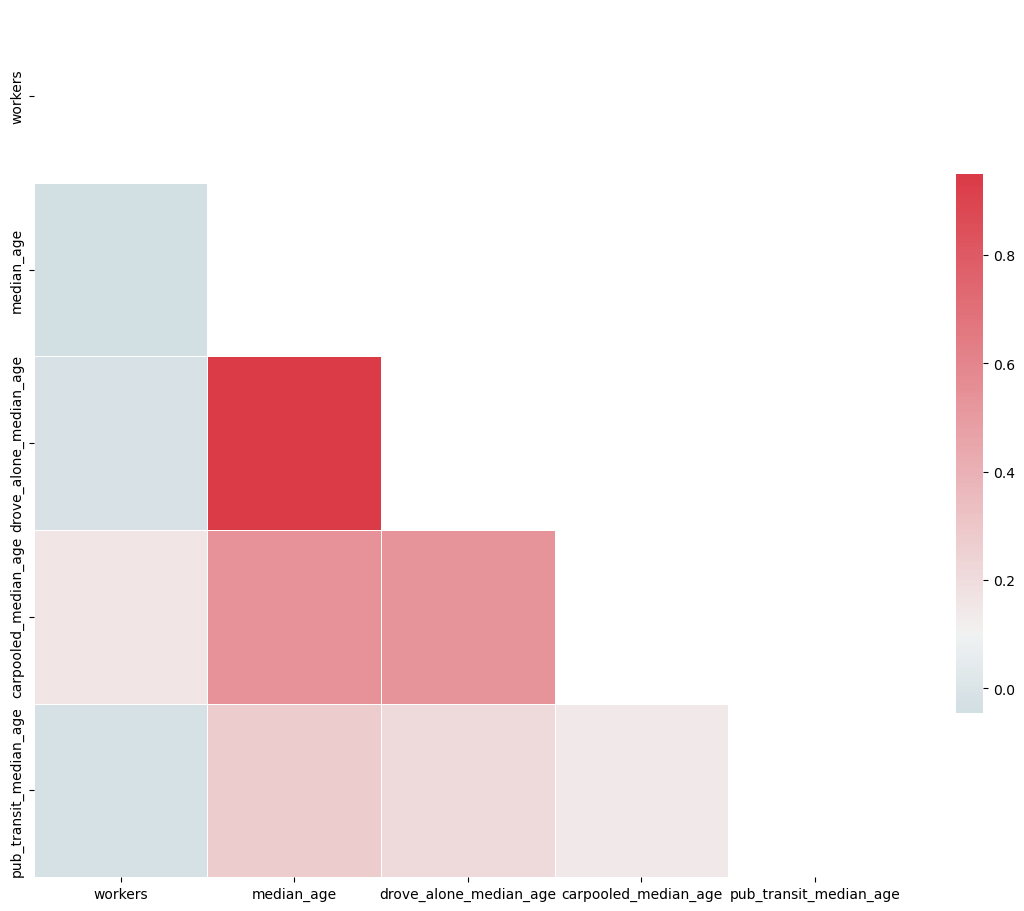

In [10]:
heatmap(avg_age, center = 0.1)
#plt.savefig('../data/dashboards/age_corr.png')

### Likewise, median age is heavily correlated with the median age of those who drive alone.

In [11]:
keep = ['workers']
for col in data.columns:
    if re.search(pattern,col) or re.search(pattern2,col):
        keep.append(col)

In [13]:
data_avg = data[keep]

In [ ]:
data_avg

In [ ]:
data_avg.corr()

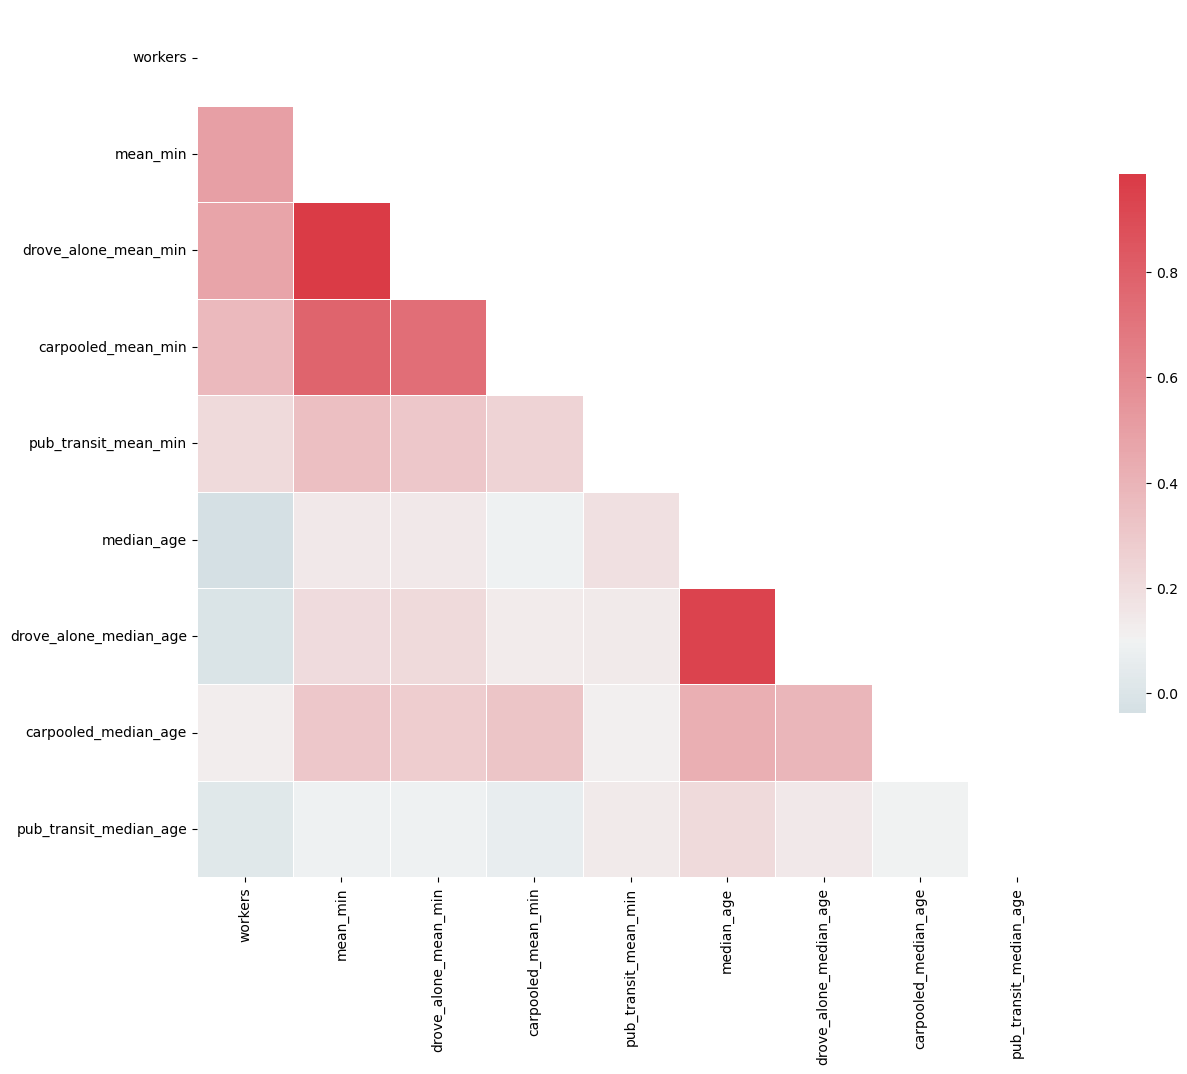

In [14]:
heatmap(data_avg, center = 0.1)

### From this, it looks like there isn't a correlation between age and commute time.

Let's investigate that further.

In [ ]:
age.describe().astype(int)

In [15]:
def heatmap_2(data, category, center = 0.1):
    pattern = re.compile(category)
    keep = ['workers']
    
    for col in data.columns:
        if re.search(pattern,col):
            keep.append(col)
    #end
    
    data = data[keep]
    
    data_corr = data.corr().loc[category+'_age_16_19':category+'_age_60_and_over',
                                category+'_10_min':category+'_60_min']
    
    fig, ax = plt.subplots(figsize=(14, 14))
    
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    
    sns.heatmap(data_corr, cmap = cmap, center = center)

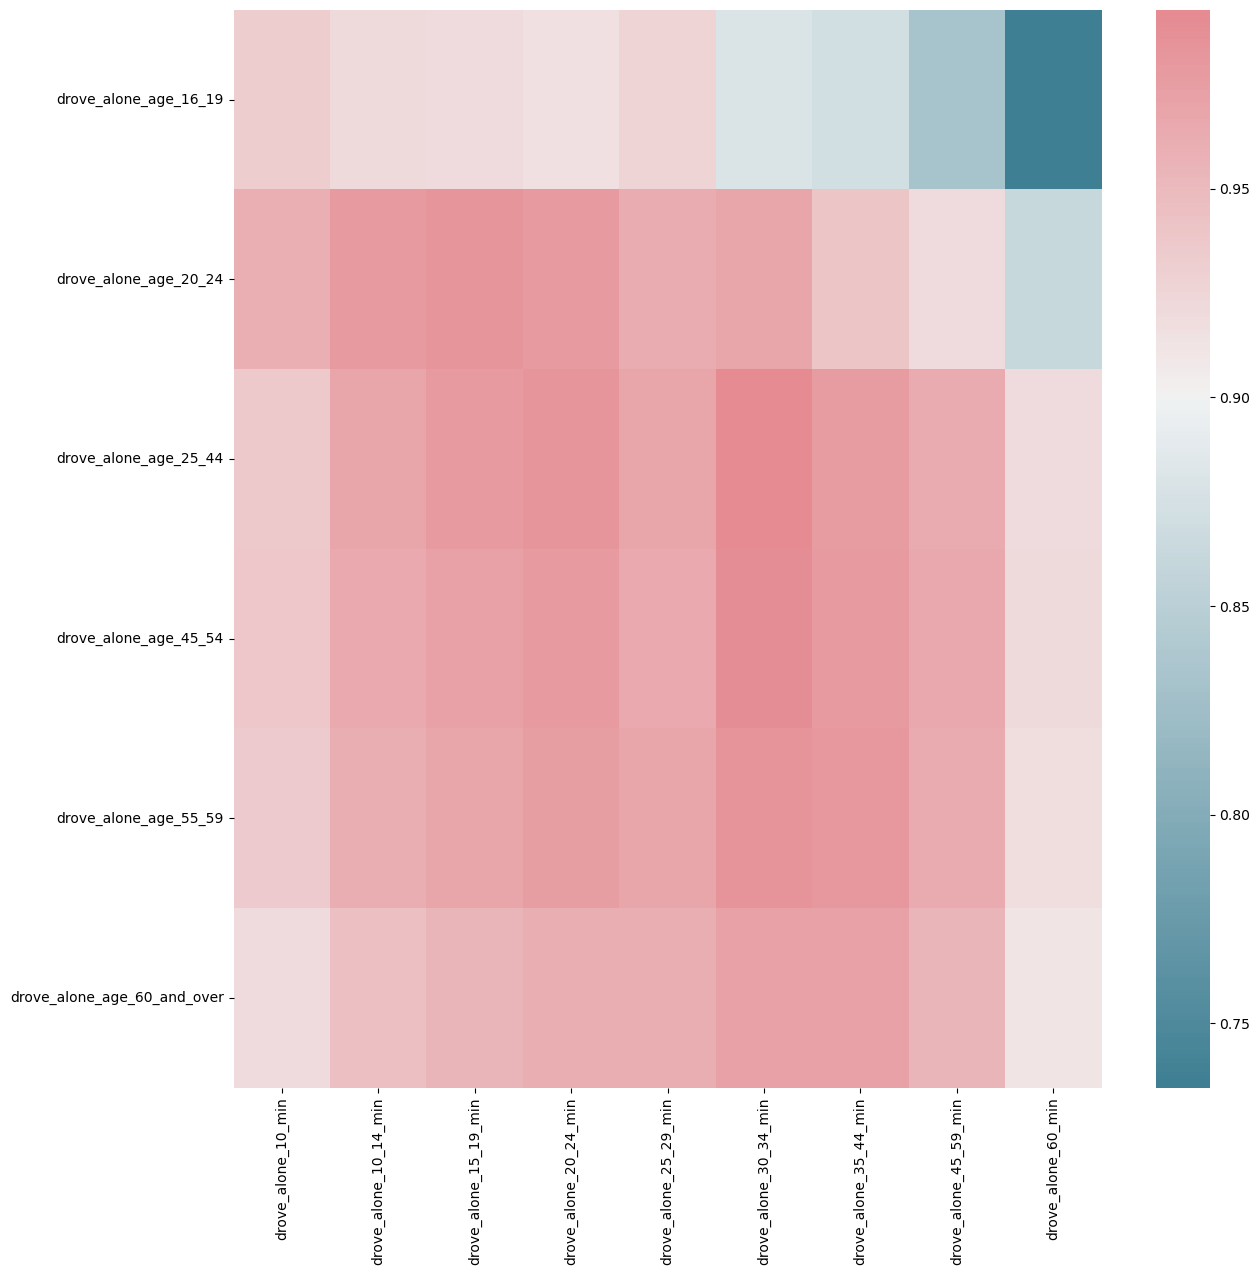

In [16]:
heatmap_2(data,'drove_alone', center = .9)

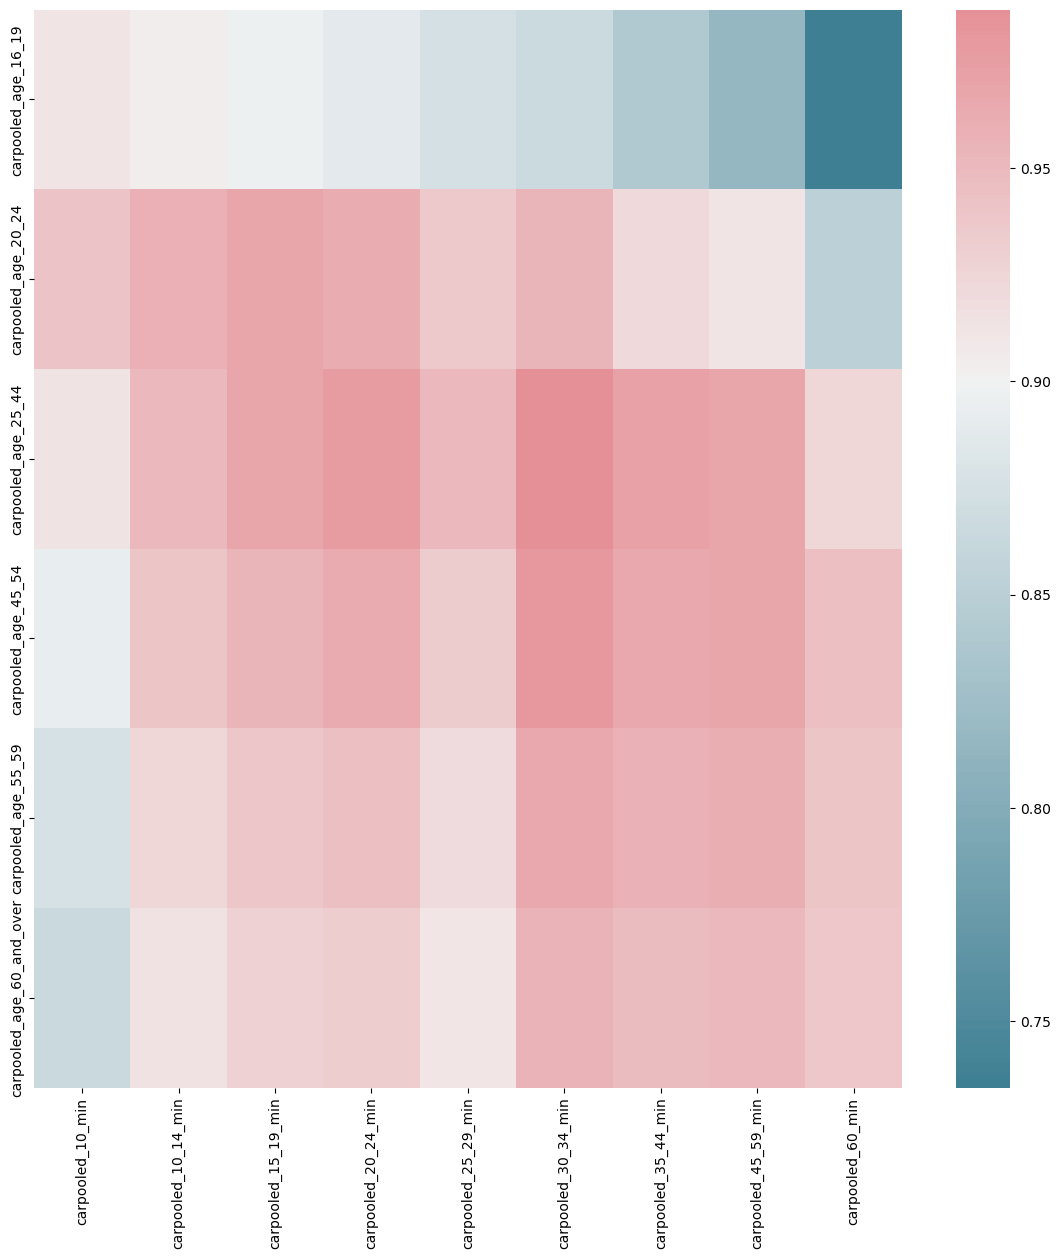

In [17]:
heatmap_2(data,'carpooled',center=0.9)

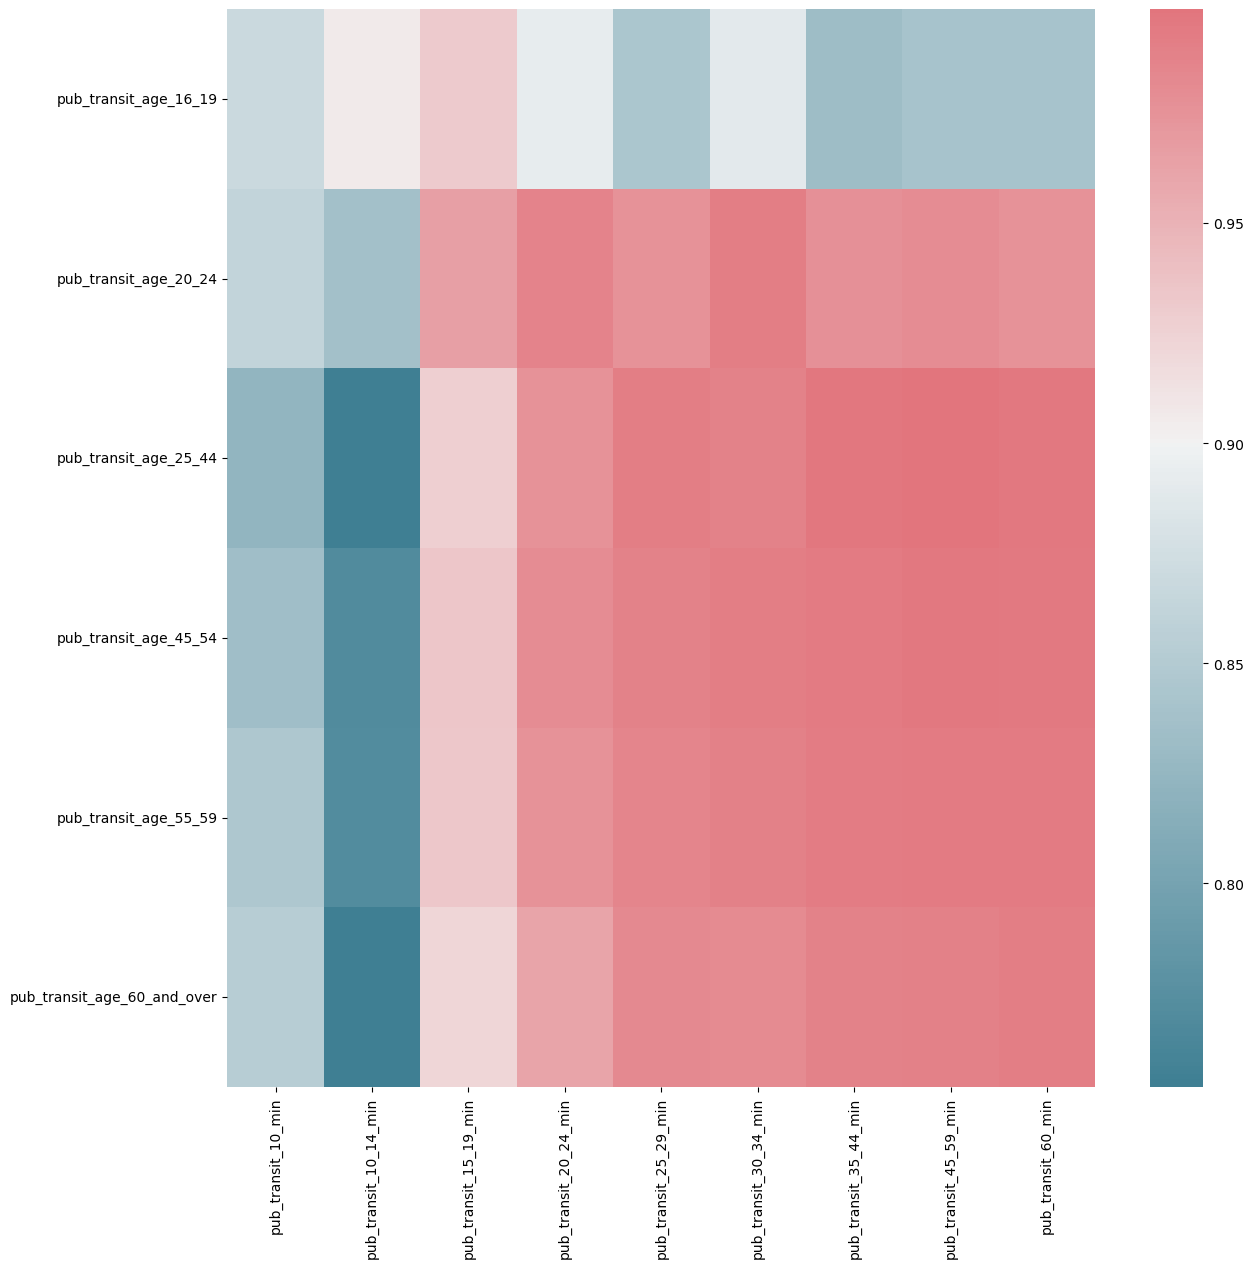

In [18]:
heatmap_2(data,'pub_transit',center=.9)

In [19]:
drove = r'drove_alone'
keep = ['workers']

for col in data.columns:
    if re.search(drove,col):
        keep.append(col)

In [ ]:
data[keep].describe().astype(int)

In [20]:
alone = data[keep]
#alone

In [21]:
alone_corr = alone.corr().loc['drove_alone_age_16_19':'drove_alone_age_60_and_over',
                              'drove_alone_10_min':'drove_alone_60_min']
alone_corr

,drove_alone_10_min,drove_alone_10_14_min,drove_alone_15_19_min,drove_alone_20_24_min,drove_alone_25_29_min,drove_alone_30_34_min,drove_alone_35_44_min,drove_alone_45_59_min,drove_alone_60_min
drove_alone_age_16_19,0.933124,0.920446,0.919721,0.915764,0.926654,0.879637,0.871598,0.831928,0.734553
drove_alone_age_20_24,0.959926,0.979094,0.983180,0.978535,0.962045,0.967255,0.940029,0.919296,0.862303
drove_alone_age_25_44,0.937204,0.967558,0.978847,0.983638,0.969581,0.992848,0.976448,0.964582,0.919318
drove_alone_age_45_54,0.937666,0.964810,0.970805,0.978939,0.965016,0.989674,0.978925,0.966609,0.921976
drove_alone_age_55_59,0.935896,0.960776,0.968001,0.975354,0.968255,0.984669,0.979782,0.964200,0.918923
drove_alone_age_60_and_over,0.919275,0.943968,0.953925,0.961061,0.961196,0.972441,0.971890,0.953894,0.911138


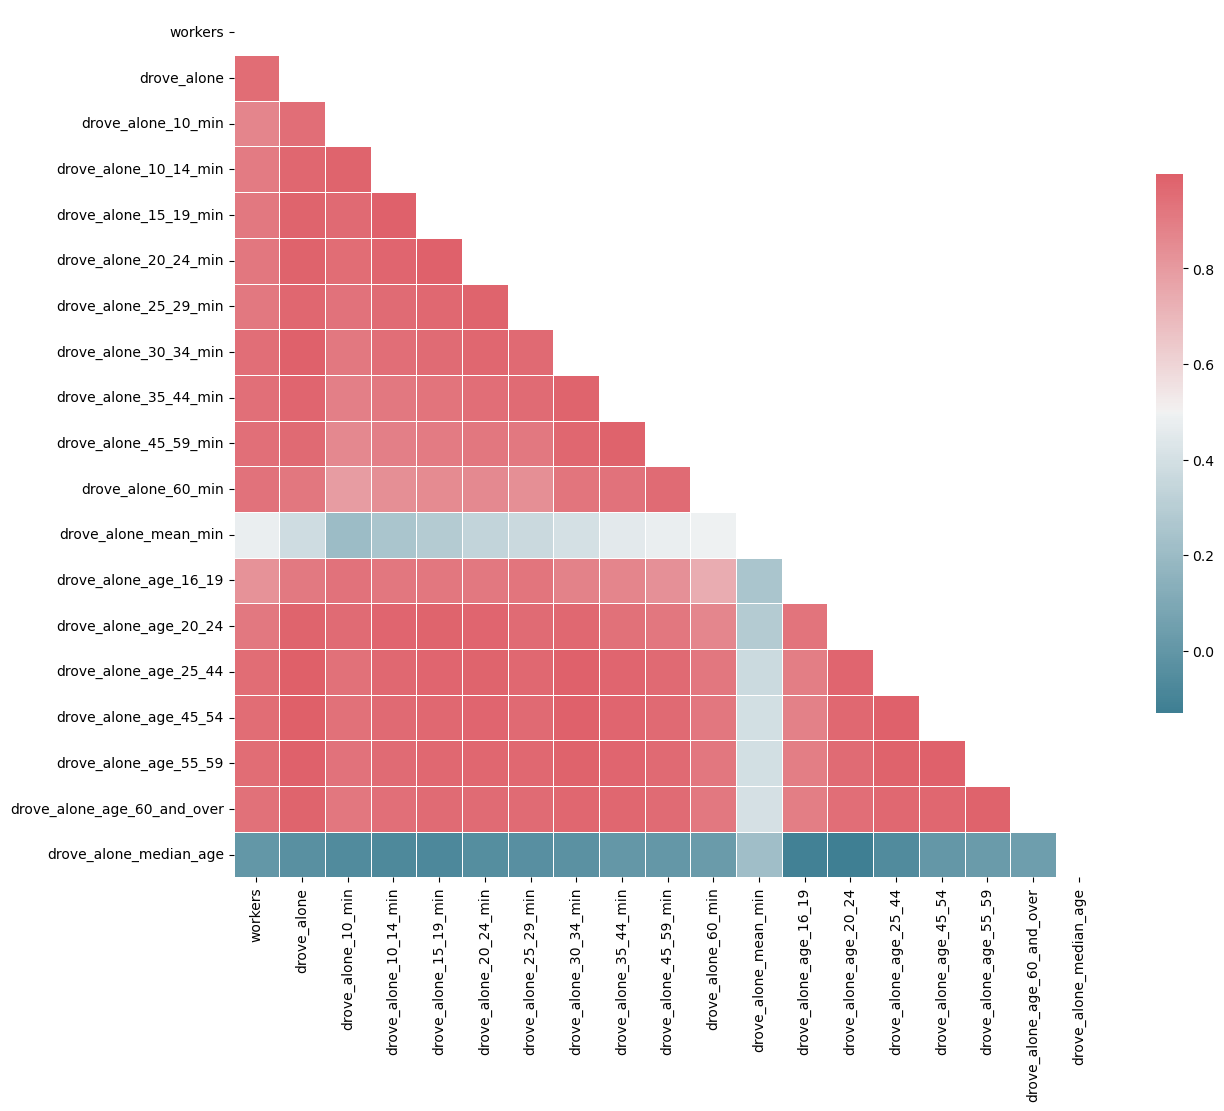

In [22]:
heatmap(alone, center = .5)

In [ ]:
sns.heatmap(alone_corr, cmap = sns.diverging_palette(220, 10, as_cmap=True), center = .9);

In [23]:
drove = r'carpool'
keep = ['workers']

for col in data.columns:
    if re.search(drove,col):
        keep.append(col)
#end

carpool = data[keep]

In [ ]:
carpool

In [ ]:
carpool.corr()

In [24]:
carpool_corr = carpool.corr().loc['carpooled_age_16_19':'carpooled_age_60_and_over',
                              'carpooled_10_min':'carpooled_60_min']
#carpool_corr

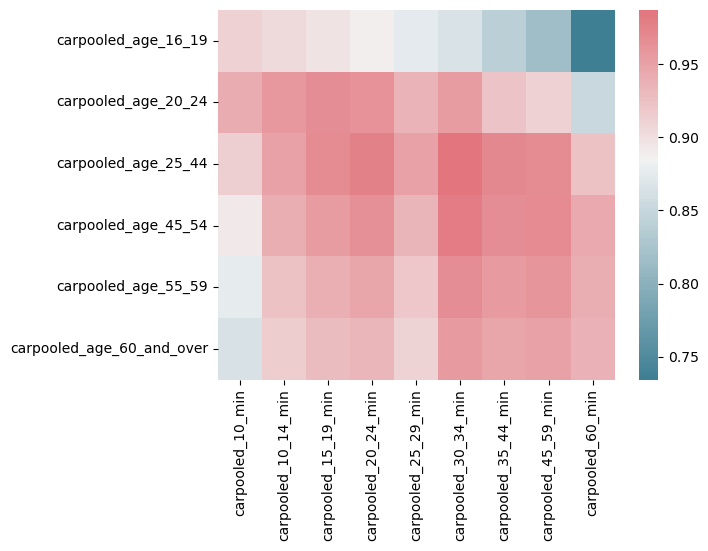

In [25]:
sns.heatmap(carpool_corr, cmap = sns.diverging_palette(220, 10, as_cmap=True), center = .885);

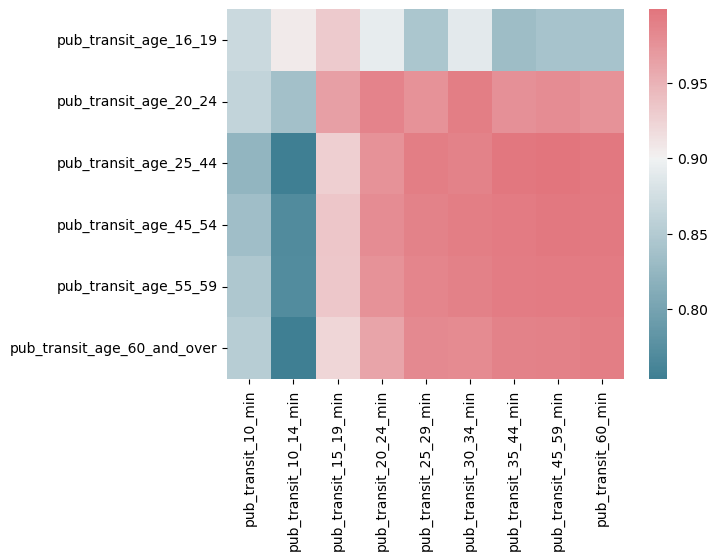

In [26]:
pattern = r'pub_'
keep = ['workers']

for col in data.columns:
    if re.search(pattern,col):
        keep.append(col)
#end

pub_transit = data[keep]

pub_transit_corr = pub_transit.corr().loc['pub_transit_age_16_19':'pub_transit_age_60_and_over',
                                          'pub_transit_10_min':'pub_transit_60_min']
sns.heatmap(pub_transit_corr, cmap = sns.diverging_palette(220, 10, as_cmap=True), center = .9);

In [ ]:
pub_transit_corr

### In the end, it doesn't look like there's a clear correlation between age and commute time.

## Next, I want to see how stats changed over years.

In [27]:
years_avg = data.groupby('year').mean(numeric_only = True).round(2)
#years_avg

In [28]:
pattern  = r'mean'
#pattern2 = r'median'
keep = ['workers']

for col in years_avg.columns:
    if re.search(pattern,col):# or re.search(pattern2,col):
        keep.append(col)
#end

In [29]:
year_times = years_avg[keep]
#year_times

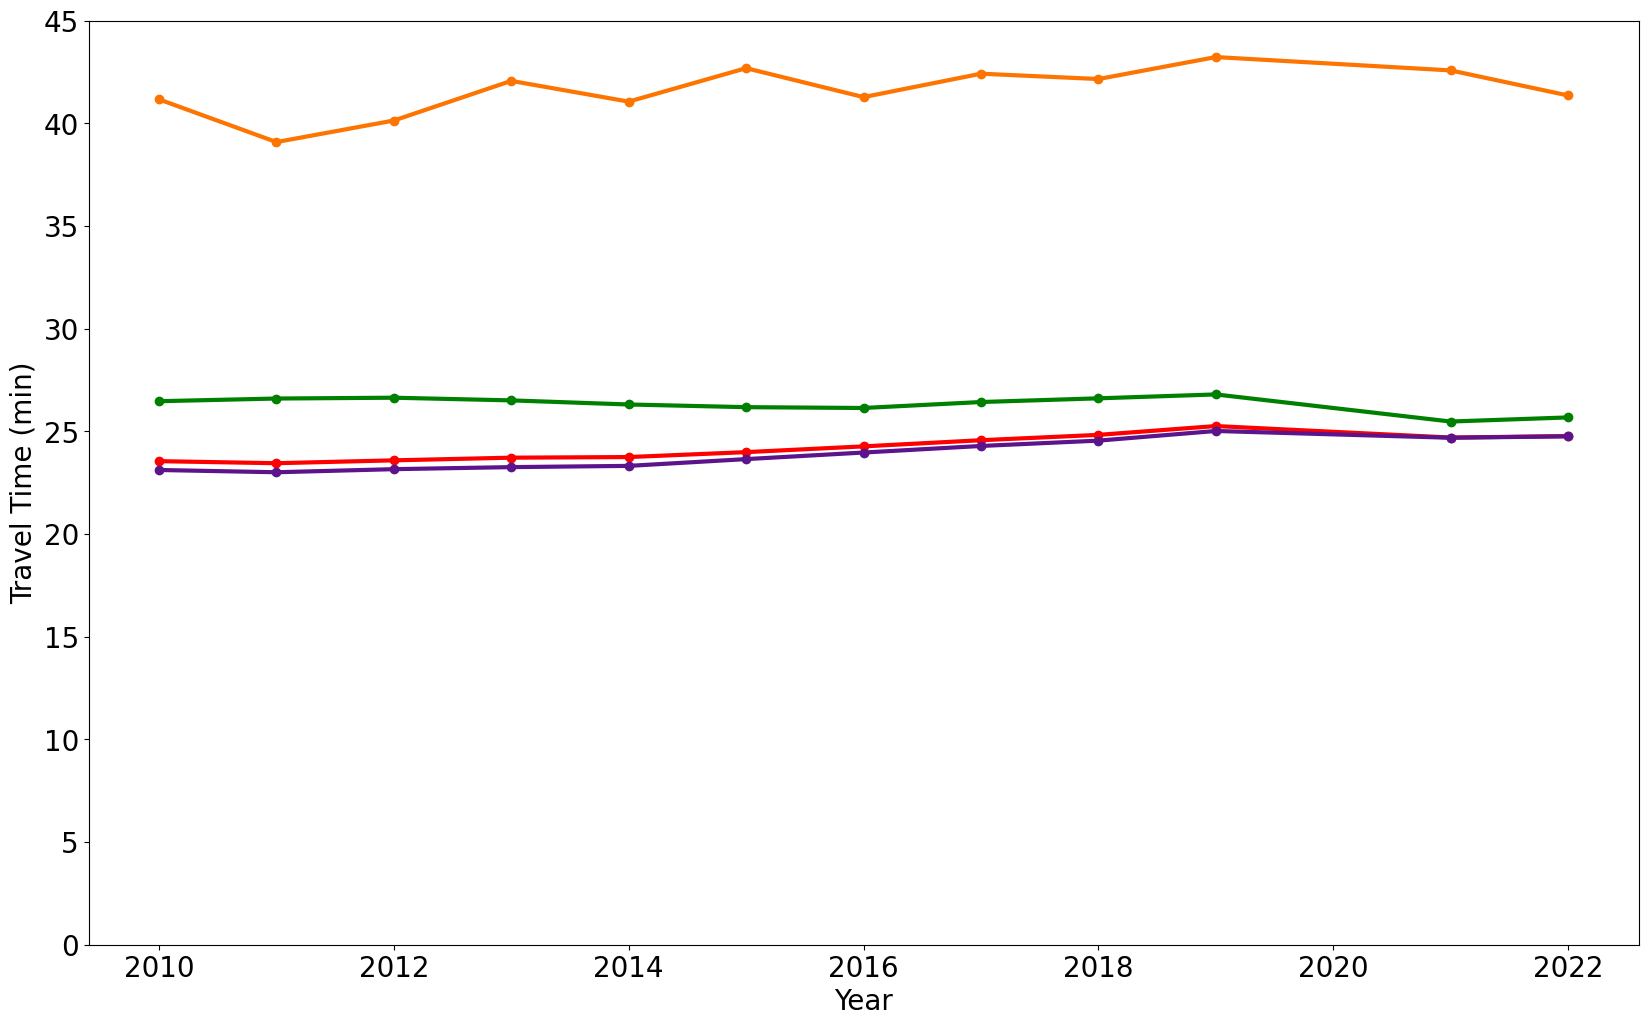

In [48]:
fig, ax = plt.subplots(1, figsize=(20,12))
ax.set_ylim([0,45])

labels = []
colors = ['r','#5c148c','g','#fd7400']

i = 0
for col in year_times.columns:
    if col != 'workers':
        line, = plt.plot(year_times[col], marker='o', label = str.capitalize(col.replace('_',' ').replace('mean min','avg time')),
                         linewidth = 3, color = colors[i])
        #plt.legend(handles = [plt.plot([],ls="-", color=line.get_color())[0]],
        #           labels=[line.get_label()])
        i += 1
#end

plt.xlabel('Year', size = 20)
plt.ylabel('Travel Time (min)', size = 20)
#ax.legend(labels = labels, handles  = "-", 
#          fontsize = 25, loc='center left', bbox_to_anchor=(1, 0.5))
ax.tick_params(axis = 'both', labelsize = 20);
# help from: https://stackoverflow.com/questions/48391146/change-marker-in-the-legend-in-matplotlib

plt.savefig('../data/dashboards/mode_times.png')

In [33]:
pattern2 = r'median'
keep = ['workers']

for col in years_avg.columns:
    if re.search(pattern2,col):
        keep.append(col)
#end

year_ages = years_avg[keep]

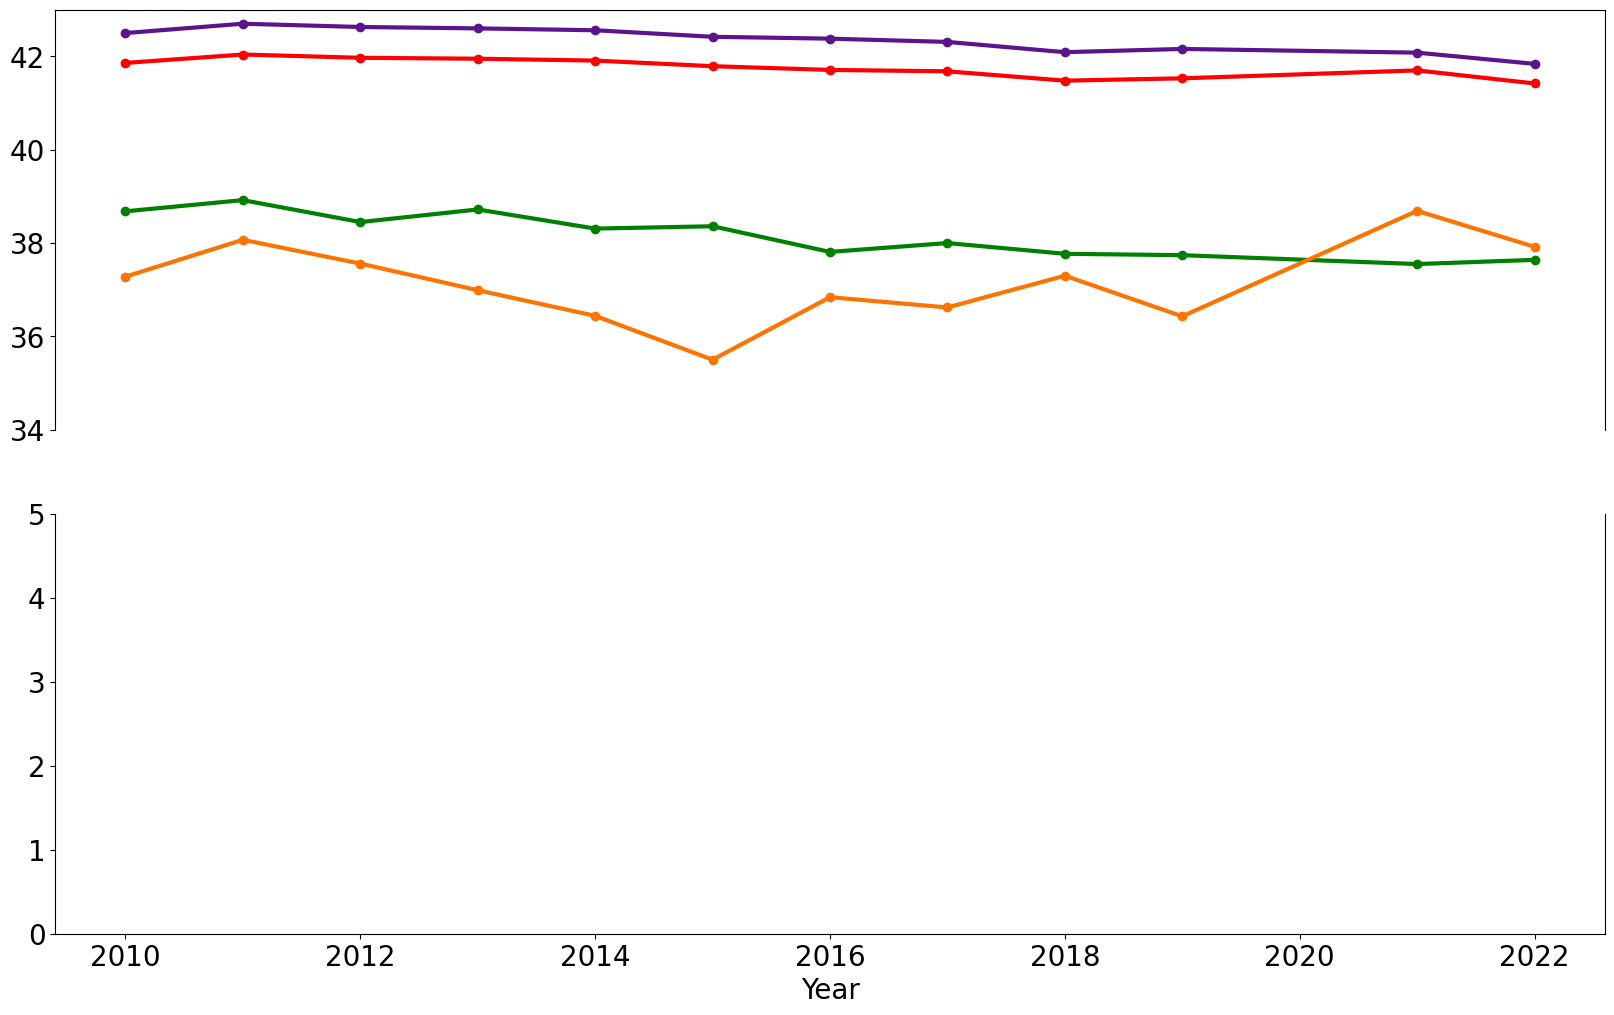

In [34]:
fig, (ax, ax2) = plt.subplots(2, 1, sharex = True, facecolor = 'w', figsize=(20,12))


plt.xlabel('Year', size = 20)
#ax.set_ylabel('Average Age (years)', size = 20)
#ax2.set_ylabel('Average Age (years)', size = 20)

ax.set_ylim([34,43])
ax2.set_ylim([0,5])

ax.spines['bottom'].set_visible(False)
ax.get_xaxis().set_visible(False)
ax2.spines['top'].set_visible(False)

ax.tick_params(labelbottom='off')

i = 0
for col in year_ages.columns:
    if col != 'workers':
        line, = ax.plot(year_ages[col], marker='o', label = str.capitalize(col.replace('_',' ').replace('min','time')),
                         linewidth = 3, color = colors[i])
        #plt.legend(handles = [plt.plot([],ls="-", color=line.get_color())[0]],
        #           labels=[line.get_label()])
        i += 1
#end



#ax.legend(labels = labels, handles  = "-", 
#          fontsize = 25, loc='center left', bbox_to_anchor=(1, 0.5))
ax.tick_params(axis = 'both', labelsize = 20)
ax2.tick_params(axis = 'both', labelsize = 20)

# help from: https://stackoverflow.com/questions/48391146/change-marker-in-the-legend-in-matplotlib
# and: https://stackoverflow.com/questions/32185411/break-in-x-axis-of-matplotlib
#plt.savefig('../data/dashboards/mode_ages.png')

In [38]:
counties = []
states = []

for county in data.index:
    county_name = county.split(', ')[0]
    state       = county.split(', ')[1]
    counties.append(county_name)
    states.append(state)
#end

In [39]:
data['county_name'] = counties
data['state'] = states

In [ ]:
#data.insert(len(data.columns)-1, data.pop('state'), states)

In [40]:
data

,workers,drove_alone,carpooled,pub_transit,10_min,drove_alone_10_min,carpooled_10_min,pub_transit_10_min,10_14_min,drove_alone_10_14_min,...,pub_transit_age_55_59,age_60_and_over,drove_alone_age_60_and_over,carpooled_age_60_and_over,pub_transit_age_60_and_over,median_age,drove_alone_median_age,carpooled_median_age,pub_transit_median_age,county_name
county,,,,,,,,,,,,,,,,,,,,,
"Calhoun County, Alabama",NaN,38242,4003,136,NaN,5545.0,340.0,0.0,NaN,7151.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Calhoun County
"Houston County, Alabama",49736.0,45459,3365,113,7311.0,6818.0,299.0,0.0,10742.0,9773.0,...,0.0,4874.0,4364.0,232.0,0.0,42.9,43.2,39.2,35.8,Houston County
"Jefferson County, Alabama",342821.0,298194,36354,2573,24683.0,19978.0,2835.0,0.0,39767.0,34888.0,...,118.0,34282.0,31310.0,1963.0,192.0,42.1,42.5,37.5,41.3,Jefferson County
"Lee County, Alabama",52066.0,40828,7187,478,10204.0,7430.0,1157.0,0.0,10152.0,8247.0,...,0.0,3800.0,2898.0,517.0,0.0,37.1,38.5,32.9,20.8,Lee County
"Madison County, Alabama",190460.0,167379,17905,776,18093.0,16068.0,1593.0,45.0,22283.0,19248.0,...,34.0,20188.0,18244.0,1611.0,0.0,42.6,43.2,38.5,38.1,Madison County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Ellis County, Texas",63500.0,54541,6841,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7302.0,6544.0,738.0,NaN,40.9,40.2,38.0,NaN,Ellis County
"Grayson County, Texas",51918.0,41969,6395,416,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,9345.0,8141.0,569.0,416.0,42.1,42.4,34.7,NaN,Grayson County
"St. Croix County, Wisconsin",36442.0,32750,2350,38,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,4773.0,4421.0,242.0,0.0,41.2,40.2,35.9,NaN,St. Croix County


In [ ]:
#data.to_csv('../data/cleaned_data/merged.csv')

In [41]:
work = data.groupby('year')['workers'].sum().to_frame()
work

,workers
year,
2010,99225964.0
2011,102230536.0
2012,106581551.0
2013,107085228.0
2014,109940018.0
2015,111403884.0
2016,111171450.0
2017,113099328.0
2018,113619705.0


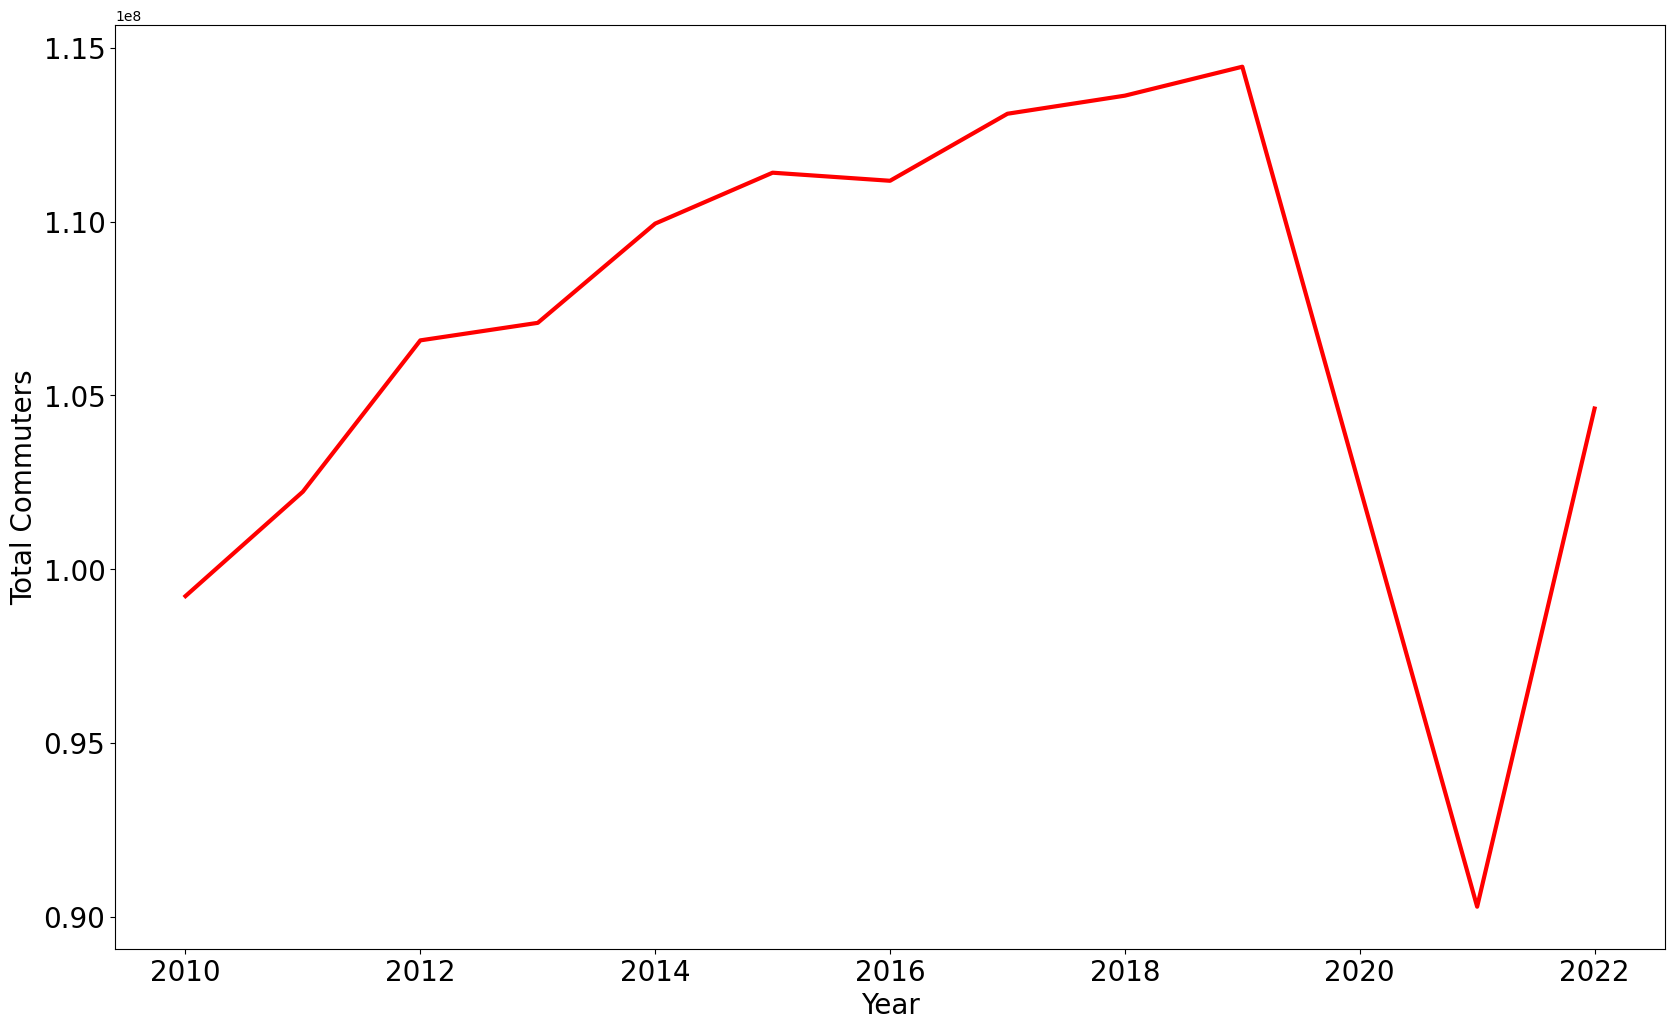

In [42]:
fig, ax = plt.subplots(1, figsize=(20,12))

sns.lineplot(x = work.index, y = work.workers, linewidth = 3, color = 'r')

plt.xlabel('Year', size = 20)
plt.ylabel('Total Commuters', size = 20)
ax.tick_params(axis = 'both', labelsize = 20);